In [1]:
import pandas as pd
folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"

df0 = pd.read_csv(folder_path + 'GSM7507506_Pt1_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name1', 'gene_type1'])



df1 = pd.read_csv(folder_path + 'GSM7507524_Pt19_genes.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
df2 = pd.read_csv(folder_path + 'GSM7507525_Pt20_genes.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
df3 = pd.read_csv(folder_path + 'GSM7507526_Pt21_genes.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
df4 = pd.read_csv(folder_path + 'GSM7507527_Pt22_genes.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
df5 = pd.read_csv(folder_path + 'GSM7507528_Pt23_genes.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
df6 = pd.read_csv(folder_path + 'GSM7507529_Pt24_genes.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])

# df1 = pd.read_csv(folder_path + 'Pt19_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
# df2 = pd.read_csv(folder_path + 'Pt20_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
# df3 = pd.read_csv(folder_path + 'Pt21_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
# df4 = pd.read_csv(folder_path + 'Pt22_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
# df5 = pd.read_csv(folder_path + 'Pt23_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])
# df6 = pd.read_csv(folder_path + 'Pt24_features.tsv.gz', delimiter = '\t', compression = 'gzip', header = None, names = ['ENS', 'gene_name2', 'gene_type2'])


In [37]:
df = pd.merge(df0, df6, left_on = 'ENS', right_on = 'ENS', how = 'outer')
df = df.drop(columns = ['gene_type1', 'gene_type2'])

In [38]:
gene_name1_list = df.loc[df['gene_name2'].isna(), 'gene_name1'].tolist()
len(gene_name1_list)

with open(folder_path + 'excluded.txt', 'w') as file:
    for item in gene_name1_list:
        file.write(item + '\n')

In [39]:
gene_name2_list = df.loc[df['gene_name1'].isna(), 'gene_name2'].tolist()
len(gene_name2_list)

with open(folder_path + 'only.txt', 'w') as file:
    for item in gene_name2_list:
        file.write(item + '\n')

In [40]:
df = df.dropna()
df
df_diff = df[df['gene_name1'] != df['gene_name2']]
df_diff

,ENS,gene_name1,gene_name2
76,ENSG00000005059,CCDC109B,MCUB
85,ENSG00000005189,AC004381.6,REXO5
93,ENSG00000005379,BZRAP1,TSPOAP1
115,ENSG00000006015,C19orf60,REX1BD
274,ENSG00000011007,TCEB3,ELOA
...,...,...,...
41720,ENSG00000283083,RP11-61G19.2,LINC02498
41727,ENSG00000283103,LLNLR-245B6.1,AC010642.2
41729,ENSG00000283117,CTD-2060L22.1,AC004949.1
41730,ENSG00000283118,RP11-107E5.4,AC009951.2


In [41]:
df_diff.to_excel(folder_path + 'Pt24_diff.xlsx', index = False)

In [110]:
df_res = df6

In [111]:
df_res = df_res.set_index('ENS')
df_res

,gene_name2,gene_type2
ENS,,
ENSG00000000003,TSPAN6,NaN
ENSG00000000005,TNMD,NaN
ENSG00000000419,DPM1,NaN
ENSG00000000457,SCYL3,NaN
ENSG00000000460,C1orf112,NaN
...,...,...
ENSG00000285458,AC093827.5,NaN
ENSG00000285467,AL136419.1,NaN
ENSG00000285471,AC007846.2,NaN


In [112]:
df_diff = df_diff.set_index('ENS')
df_diff

,gene_name1,gene_name2
ENS,,
ENSG00000005059,CCDC109B,MCUB
ENSG00000005189,AC004381.6,REXO5
ENSG00000005379,BZRAP1,TSPOAP1
ENSG00000006015,C19orf60,REX1BD
ENSG00000011007,TCEB3,ELOA
...,...,...
ENSG00000283083,RP11-61G19.2,LINC02498
ENSG00000283103,LLNLR-245B6.1,AC010642.2
ENSG00000283117,CTD-2060L22.1,AC004949.1


In [113]:
df_res = df_res.join(df_diff[['gene_name1']], how = 'left')
df_res


,gene_name2,gene_type2,gene_name1
ENS,,,
ENSG00000000003,TSPAN6,NaN,NaN
ENSG00000000005,TNMD,NaN,NaN
ENSG00000000419,DPM1,NaN,NaN
ENSG00000000457,SCYL3,NaN,NaN
ENSG00000000460,C1orf112,NaN,NaN
...,...,...,...
ENSG00000285458,AC093827.5,NaN,NaN
ENSG00000285467,AL136419.1,NaN,NaN
ENSG00000285471,AC007846.2,NaN,NaN


In [114]:
df_res['gene_name2'] = df_res['gene_name1'].fillna(df_res['gene_name2'])
df_res

,gene_name2,gene_type2,gene_name1
ENS,,,
ENSG00000000003,TSPAN6,NaN,NaN
ENSG00000000005,TNMD,NaN,NaN
ENSG00000000419,DPM1,NaN,NaN
ENSG00000000457,SCYL3,NaN,NaN
ENSG00000000460,C1orf112,NaN,NaN
...,...,...,...
ENSG00000285458,AC093827.5,NaN,NaN
ENSG00000285467,AL136419.1,NaN,NaN
ENSG00000285471,AC007846.2,NaN,NaN


In [115]:
df_res = df_res.drop(columns = 'gene_name1')
df_res

,gene_name2,gene_type2
ENS,,
ENSG00000000003,TSPAN6,NaN
ENSG00000000005,TNMD,NaN
ENSG00000000419,DPM1,NaN
ENSG00000000457,SCYL3,NaN
ENSG00000000460,C1orf112,NaN
...,...,...
ENSG00000285458,AC093827.5,NaN
ENSG00000285467,AL136419.1,NaN
ENSG00000285471,AC007846.2,NaN


In [116]:
df_res = df_res.reset_index()
df_res = df_res.drop(columns = 'gene_type2')
df_res

,ENS,gene_name2
0,ENSG00000000003,TSPAN6
1,ENSG00000000005,TNMD
2,ENSG00000000419,DPM1
3,ENSG00000000457,SCYL3
4,ENSG00000000460,C1orf112
...,...,...
33566,ENSG00000285458,AC093827.5
33567,ENSG00000285467,AL136419.1
33568,ENSG00000285471,AC007846.2
33569,ENSG00000285492,AL356417.3


In [117]:
df_res.insert(2, 'gene_type', 'Gene Expression')
df_res

,ENS,gene_name2,gene_type
0,ENSG00000000003,TSPAN6,Gene Expression
1,ENSG00000000005,TNMD,Gene Expression
2,ENSG00000000419,DPM1,Gene Expression
3,ENSG00000000457,SCYL3,Gene Expression
4,ENSG00000000460,C1orf112,Gene Expression
...,...,...,...
33566,ENSG00000285458,AC093827.5,Gene Expression
33567,ENSG00000285467,AL136419.1,Gene Expression
33568,ENSG00000285471,AC007846.2,Gene Expression
33569,ENSG00000285492,AL356417.3,Gene Expression


In [118]:
df_res.to_csv(folder_path + 'Pt24_features.tsv.gz', sep = '\t', index = False, header = False, compression = 'gzip')

---

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'gene': ['Pt19', 'Pt20', 'Pt21', 'Pt22', 'Pt23', 'Pt24'],
    '# in features.tsv': [33694, 33694, 33694, 33694, 33694, 33694],
    '# in genes.tsv': [30605, 30531, 31304, 30184, 32122, 33571],
    'only in genes.tsv': [10118, 10086, 10207, 10850, 8964, 8490],
    'only in features.tsv': [7029, 6923, 7817, 7340, 7392, 8367],
    'same': [23576, 23608, 23487, 22844, 24730, 25204],
    'diff': [5474, 5475, 5826, 5175, 6239, 6492]
}
df = pd.DataFrame(data)

In [6]:
df

,gene,# in features.tsv,# in genes.tsv,only in genes.tsv,only in features.tsv,same,diff
0,Pt19,33694,30605,10118,7029,23576,5474
1,Pt20,33694,30531,10086,6923,23608,5475
2,Pt21,33694,31304,10207,7817,23487,5826
3,Pt22,33694,30184,10850,7340,22844,5175
4,Pt23,33694,32122,8964,7392,24730,6239
5,Pt24,33694,33571,8490,8367,25204,6492


In [7]:
df.set_index('gene', inplace = True)
df

,# in features.tsv,# in genes.tsv,only in genes.tsv,only in features.tsv,same,diff
gene,,,,,,
Pt19,33694,30605,10118,7029,23576,5474
Pt20,33694,30531,10086,6923,23608,5475
Pt21,33694,31304,10207,7817,23487,5826
Pt22,33694,30184,10850,7340,22844,5175
Pt23,33694,32122,8964,7392,24730,6239
Pt24,33694,33571,8490,8367,25204,6492


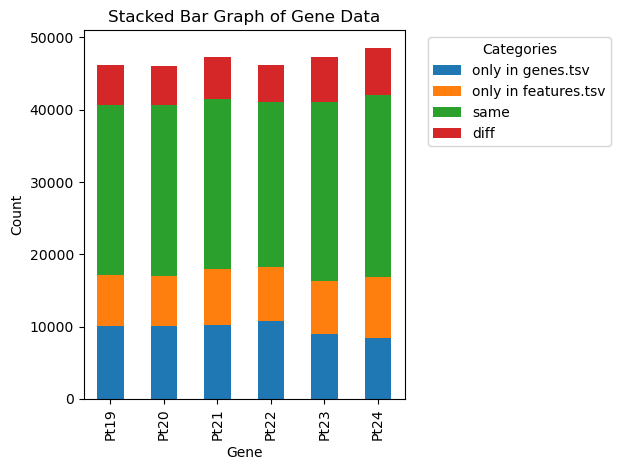

In [10]:

ax = df[['only in genes.tsv', 'only in features.tsv', 'same', 'diff']].plot(kind='bar', stacked=True)

# 그래프 제목 및 레이블 설정
plt.title('Stacked Bar Graph of Gene Data')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.legend(title='Categories')

# 범례를 그래프 바깥쪽으로 이동
ax.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 보여주기
plt.tight_layout()
plt.show()